In [1]:
# Import the libraries
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")
import numpy as np

import pandas as pd
import import_ipynb
from cancer_helper import *
from init_data import *

importing Jupyter notebook from cancer_helper.ipynb
importing Jupyter notebook from init_data.ipynb


In [4]:
# Process the CSV data and put it into X as features
np_data = pd.read_csv('STAD.csv',keep_default_na=False, sep=';',header=None, encoding = "utf-8").values
X, feature_labels, vital_status, death_days_to, outcome = init_data_STAD(np_data)
num_groups = 5

**Vital status**

In class model:
Average train final cost: nan
Average train accuracy: 37.10 %
Average train F1 score: 0.40
Average test accuracy: 36.27 %
Average test F1 score: 0.39


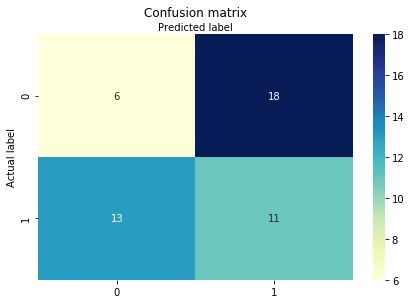


Scikit model:
Average train final cost: 7.42
Average train accuracy: 78.53 %
Average train F1 score: 0.80
Average test final cost: 8.92
Average test accuracy: 74.17 %
Average test F1 score: 0.75
Average Gaussian Naive Bayes accuracy: 65.00 %


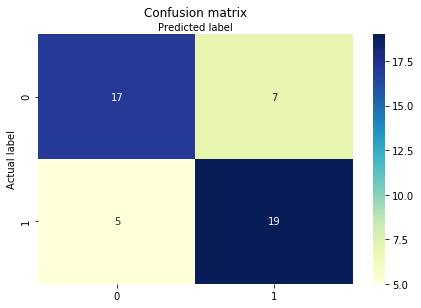


Highest average weights:
tumor_status : 10.61
tumor_stage_2a : 4.66
new_tumor_event_type : 4.24


In [5]:
y = vital_status
iters = 200 # recommended 40000
alpha = 0.00000001

vital_status_train(X, y, alpha, iters, num_groups, feature_labels)

**Death days to**

In [6]:
dead = np.nonzero(vital_status == 0)[0]
y = death_days_to[dead].astype('int')
X_death = X[dead, :]
iters = 4000
alpha = 0.005

death_days_to_train(X_death, y, alpha, iters, num_groups)

In-class model:
Average final cost: nan
Mean in y: 456.41
Variance in y: 125617.15

Scikit model:
Average train accuracy: 63.10 %
Average test accuracy: 51.67 %


**Outcome**

In class model:
Logistic regression:
Average train final cost: nan
Average train accuracy: 69.18 %
Average train F1 score: 0.69
Average test accuracy: 68.27 %
Average test F1 score: 0.68


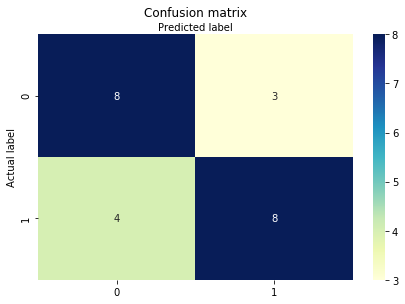


One vs all:
Average train accuracy: 87.49 %
Average train F1 score: 0.88
Average test accuracy: 83.78 %
Average test F1 score: 0.85


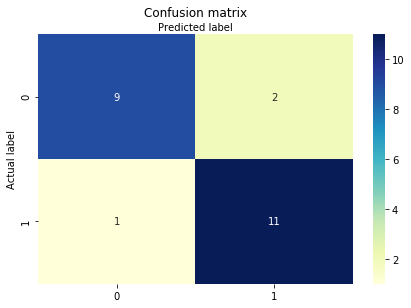


Scikit model:
Average train accuracy: 87.29 %
Average train F1 score: 0.87
Average test accuracy: 83.78 %
Average test F1 score: 0.84


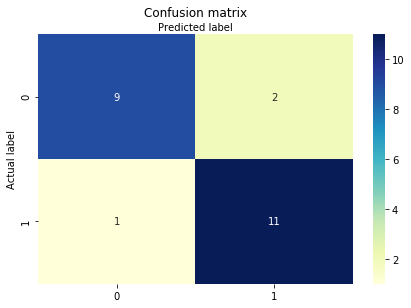


Highest average weights:
tumor_status : 15.79
histological_type_stad_nos : 3.98
histological_type_stad_ring : 2.83


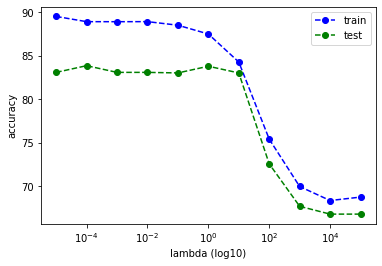

In [7]:
y = outcome
lambda_val = 1
interested_in = [0, 2]

# print_num_samples(y)
outcome_train(X, y, interested_in, lambda_val, num_groups, feature_labels)